# 30회 ADP 복원

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : 캐글어딘가.. 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv
- 데이터 설명 : 혈압 데이터 DBP

## 1-1  EDA를 시행하라

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv'
df = pd.read_csv(url)

def resume(df):
    print(df.shape)
    tmp = pd.DataFrame()
    tmp['dtypes'] = df.dtypes
    tmp['isna'] = df.isna().sum()
    tmp['nunique'] = df.nunique()
    tmp['mean'] = df.mean().round(2)
    tmp['std'] = df.std().round(2)
    tmp['25%'] = df.quantile(0.25)
    tmp['50%'] = df.quantile(0.5)
    tmp['70%'] = df.quantile(0.75)
    tmp['1st']= df.iloc[0,:]
    tmp['2nd']= df.iloc[1,:]
    return tmp

resume(df)

(4303, 12)


,dtypes,isna,nunique,mean,std,25%,50%,70%,1st,2nd
Age,int64,0,70,48.09,14.69,35.00,46.00,59.00,26.00,40.00
Gender,int64,0,2,1.35,0.48,1.00,1.00,2.00,1.00,1.00
BMI,float64,0,275,24.12,3.40,21.70,24.00,26.30,20.10,17.70
DBP,int64,0,75,76.36,11.00,69.00,76.00,83.00,81.00,54.00
FPG,float64,0,361,5.23,0.78,4.70,5.14,5.70,5.80,4.60
Chol,float64,1,486,4.86,0.93,4.20,4.79,5.43,4.36,3.70
Tri,float64,0,478,1.59,1.26,0.86,1.28,1.94,0.86,1.02
HDL,float64,0,188,1.67,1.08,1.13,1.34,1.61,0.90,1.50
LDL,float64,0,384,2.98,0.89,2.35,2.82,3.42,2.43,2.04
ALT,float64,0,680,26.75,22.28,14.30,20.50,31.05,12.00,9.20


<AxesSubplot: >

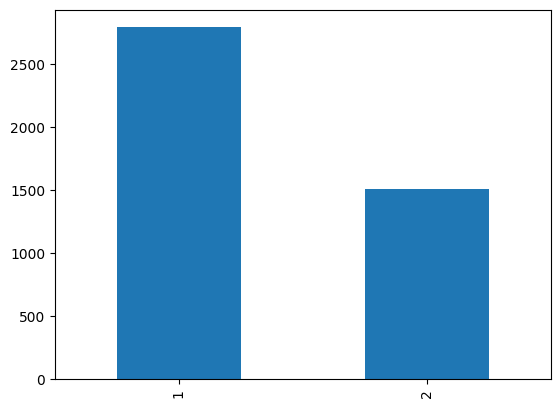

In [2]:
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Age', ylabel='Density'>

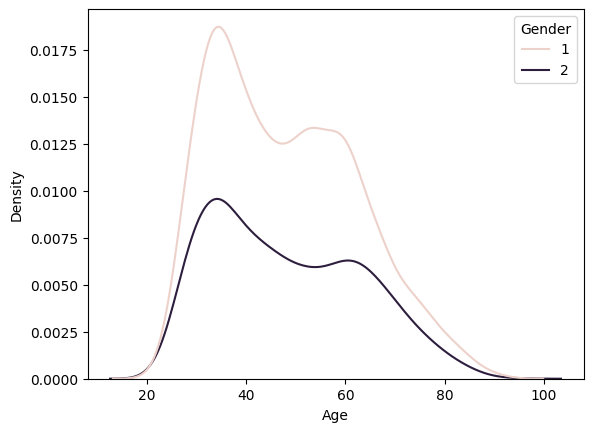

In [3]:
import seaborn as sns
sns.kdeplot(data = df, x = 'Age', hue='Gender')

- 성별로는 1번이 2번성에 비해 더 많으며, 30대의 데이터가 많은 데이터

<AxesSubplot: ylabel='Density'>

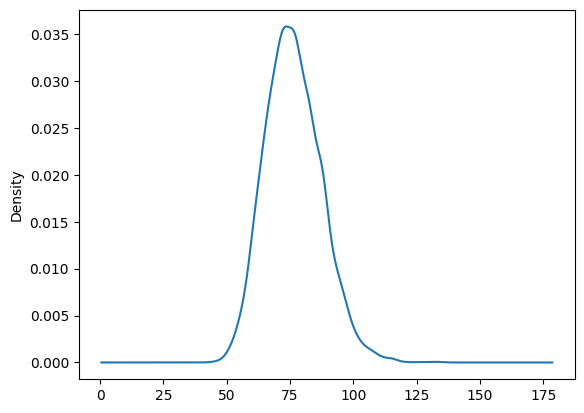

In [4]:
df['DBP'].plot(kind='kde')

- 전체 성향은 정규분포의 모양을 띈다

In [ ]:
import seaborn as sns
sns.pairplot(df, hue = 'Gender');

## 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라

In [6]:
import numpy as np
def outlier_iqr(df, column):
    q1, q3 = np.percentile(df[column],0.25),np.percentile(df[column],0.75)
    iqr = q3 - q1
    c = 1.5 * iqr
    low, high = q1 - c, q3 + c
    outliers = df[(df[column] < low) | (df[column] > high)]
    return outliers
{c:len(outlier_iqr(df, c))/len(df) for c in df.columns}

{'Age': 0.9814083197768998,
 'Gender': 0.35161515221938183,
 'BMI': 0.9760632117127586,
 'DBP': 0.9781547757378574,
 'FPG': 0.9007669068092029,
 'Chol': 0.0,
 'Tri': 0.7527306530327679,
 'HDL': 0.9507320474087846,
 'LDL': 0.9723448756681385,
 'ALT': 0.9509644434115733,
 'CCR': 0.9920985359051824,
 'FFPG': 0.9832674877992098}

In [ ]:
df.plot(kind='box',subplots=True, layout=(4,4), figsize = (20,20));

- BoxPlot을 확인하며, 너무큰 이상치를 제거
- 이상치가 많으므로 특히 이상치가 많은 DBP, ALT, CCR은 log변환을 적용한다.
- Robust Scaling사용하여 이상치의 영향을 적게 받도록 한다.
- 나이를 범주형으로 만들어서 일반화 한다.
- 1건의 결측치를 제거한다.

- BoxPlot을 확인하며, 너무큰 이상치를 제거

In [9]:
to_drop = []
[to_drop.append(df[df['ALT']>200].index[i]) for i in range(len(df[df['ALT']>200].index))]
[to_drop.append(df[df['CCR']>170].index[i]) for i in range(len(df[df['CCR']>170].index))]
[to_drop.append(df[df['FFPG']>17].index[i]) for i in range(len(df[df['FFPG']>17].index))]
[to_drop.append(df[df['Tri']>30].index[i]) for i in range(len(df[df['Tri']>30].index))]
df_ = df.drop(to_drop, axis=0)

- 이상치가 많으므로 특히 이상치가 많은 ALT, CCR은 log변환을 적용한다.

In [ ]:
cs = ['ALT', 'CCR']
for c in cs:
    df[c] = np.log(df[c])
df

- 결측치를 제거

In [ ]:
resume(df)

In [12]:
df = df.dropna()

- Robust Scaling사용하여 이상치의 영향을 적게 받도록 한다.

In [ ]:
from sklearn.preprocessing import RobustScaler
X = df.drop('DBP', axis =1)
y = df['DBP'].values
scaler = RobustScaler()
X_f = X.columns
X_s = scaler.fit_transform(X)
X_s = pd.DataFrame(X_s, columns= X.columns)
X_s

## 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size =0.3, random_state=42)


# train set과 test set의 종속변수 평균 계산
train_mean = np.mean(y_train)
test_mean = np.mean(y_test)

# 결과 출력
print(f"Train set 평균: {train_mean:.2f}")
print(f"Test set 평균: {test_mean:.2f}")

# t-test를 통해 평균이 유의미하게 다른지 확인
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(y_train, y_test)
print(f"T-통계량: {t_stat:.2f}")
print(f"P-값: {p_value:.4f}")

# P-값 해석
if p_value < 0.05:
    print("평균이 유의미하게 다릅니다 (귀무가설 기각)")
else:
    print("평균이 유의미하게 다르지 않습니다 (귀무가설 채택)")

Train set 평균: 76.32
Test set 평균: 76.45
T-통계량: -0.34
P-값: 0.7328
평균이 유의미하게 다르지 않습니다 (귀무가설 채택)


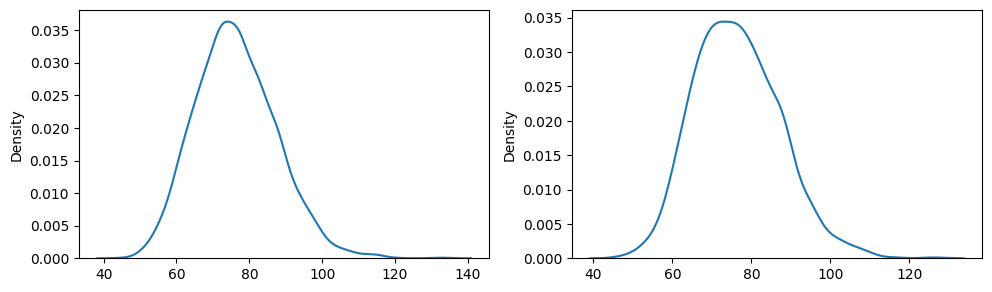

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 3))
ys = [y_train, y_test]

for idx, y_ in enumerate(ys):
    plt.subplot(1, 2, idx+1)
    sns.kdeplot(data=y_)

fig.tight_layout(pad=1.0)

## 2-2 2-1 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명



- 선형성: 독립변수와 종속변수 간의 관계가 선형적이어야
  > 독립변수의 변화에 따라 종속변수도 일정한 비율로 변화


- 독립성: 각각의 관측치는 서로 독립적
  > 하나의 관측치가 다른 관측치에 영향을 미치지 않아야

- 등분산성:오차항의 분산이 독립변수의 값에 관계없이 일정해야 함
  > 잔차 간 일정한 분산


- 정규성: 오차항은 정규분포를 따라야 합니다.
  > 잔차가 정규분포를 따라야 함

- 선형독립성: 독립변수들 간에 다중공선성이 없어야 합니다.
  > 독립변수들 간에 강한 선형 관계가 없어야


이러한 기본가정을 데이터가 충족하는지 확인하기 위해 회귀분석을 수행한 후, 잔차분석을 통해 가정을 검토할 수 있습니다. 잔차분석을 통해 잔차가 무작위로 분포되어 있는지, 등분산성을 만족하는지, 정규성을 따르는지 등을 확인할 수 있습니다.


따라서, 회귀분석의 기본가정을 데이터가 만족하는지 확인하려면 회귀분석을 수행한 후 잔차분석을 통해 각 가정을 검토해야 합니다.

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the OLS model
model = sm.OLS(y, X_s).fit()

# Print the regression results
print("Regression Results:")
print(model.summary())

Regression Results:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.490
Method:                 Least Squares   F-statistic:                              376.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:58:21   Log-Likelihood:                         -23346.
No. Observations:                4302   AIC:                                  4.671e+04
Df Residuals:                    4291   BIC:                                  4.678e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

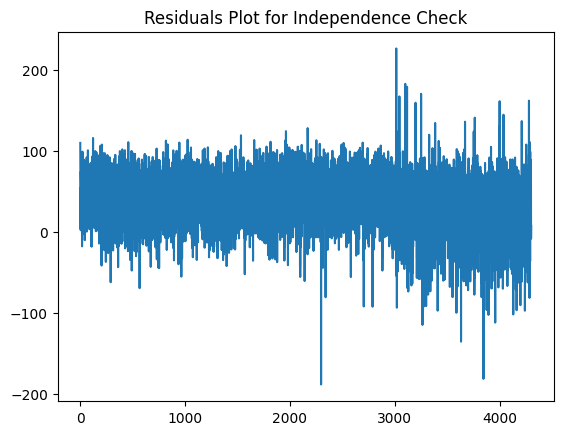


등분산성 검증 결과:
LM Statistic: 640.6953936005228
LM-Test p-value: 2.737334528177694e-130

정규성 검증 결과:
Shapiro-Wilk Test Statistic: 0.973143458366394
Shapiro-Wilk Test p-value: 1.047381755737016e-27


In [17]:
# 독립성 검증 (잔차의 자기상관성 검증)
residuals = model.resid
plt.plot(residuals)
plt.title("Residuals Plot for Independence Check")
plt.show()

# 등분산성 검증
import statsmodels.api as sm
X = sm.add_constant(X) # 상수항 추가
bp_test = het_breuschpagan(y, X)
print("\n등분산성 검증 결과:")
print("LM Statistic:", bp_test[0])
print("LM-Test p-value:", bp_test[1])

# 정규성 검증
shapiro_test = shapiro(residuals)
print("\n정규성 검증 결과:")
print("Shapiro-Wilk Test Statistic:", shapiro_test[0])
print("Shapiro-Wilk Test p-value:", shapiro_test[1])

In [18]:
# VIF를 통한 다중공선성 진단 (선형독립성 진단)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_s.columns
vif_data["VIF"] = [variance_inflation_factor(X_s.values, i) for i in range(X_s.shape[1])]

print("\n다중공선성 진단 결과:")
print(vif_data)


다중공선성 진단 결과:
   Feature       VIF
0      Age  1.355852
1   Gender  1.447906
2      BMI  1.452261
3      FPG  1.440663
4     Chol  2.937704
5      Tri  1.371722
6      HDL  2.945577
7      LDL  4.843097
8      ALT  1.412255
9      CCR  1.329903
10    FFPG  1.513983


- 다중공선성 진단결과 결과값이 10 이하로, 다중공선성의 문제가 거의 없다고 판단하여 선형독립성을 만족한다

## 3-1 회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점 비교

- 기본모델로는 linearRegression
- 비교모델1로는 약한모델을 결합하여 회귀하는 앙상블기법 활용,
- 비교모델2로는 부스팅기법을 활용한 XGBRegressor를 적용

## 3-2. 1-3에서 구분한 데이터를 기준으로 3개의 회귀 분석 모델링을 진행하고 평가지표 rmse로 가장 최적화된 알고리즘 선정

In [19]:
from sklearn.linear_model import LinearRegression # base model
from sklearn.ensemble import RandomForestRegressor # 비교 model1
from xgboost import XGBRegressor # 비교 model2
from time import time
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

models_name = ['LinearRegression','RandomForestRegressor','XGBRegressor']
models = [lr,rf,xgb]

for idx,model in  enumerate(models):
    s = time()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    e = time()
    print(f'-----------{models_name[idx]}---------')
    print(f'{models_name[idx]}시간 : {e-s:.5f}')
    print(f'RMSE : {np.sqrt(mean_squared_error(y_test, preds)):.5f}')

-----------LinearRegression---------
LinearRegression시간 : 0.00600
RMSE : 9.88606
-----------RandomForestRegressor---------
RandomForestRegressor시간 : 1.82669
RMSE : 10.10393
-----------XGBRegressor---------
XGBRegressor시간 : 0.08851
RMSE : 10.62583


## 3-3 3-2에서 가장 성능 좋은 알고리즘을 이용하여 K-Fold 교차검증을 수행하시오.

In [26]:
X =X.reset_index()

In [28]:
X

,index,const,Age,Gender,BMI,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,0,1.0,26,1,20.1,5.80,4.36,0.86,0.90,2.43,2.484907,4.155753,5.40
1,1,1.0,40,1,17.7,4.60,3.70,1.02,1.50,2.04,2.219203,4.252772,4.10
2,2,1.0,40,2,19.7,5.30,5.87,1.29,1.75,3.37,2.312535,4.112512,4.85
3,3,1.0,43,1,23.1,4.50,4.05,0.74,1.27,2.60,3.597312,4.295924,5.30
4,4,1.0,36,1,26.5,5.54,6.69,3.49,0.91,3.64,4.238445,4.212128,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,4298,1.0,54,1,23.4,6.82,5.00,1.50,1.24,2.98,2.079442,4.343805,6.70
4298,4299,1.0,50,2,22.3,5.32,4.37,2.09,1.37,2.29,3.054001,3.856510,6.55
4299,4300,1.0,67,1,24.6,4.85,3.89,1.38,1.14,2.17,2.895912,4.257030,6.80
4300,4301,1.0,60,2,29.0,6.70,5.91,1.29,1.73,2.85,2.939162,3.916015,7.00


In [29]:
from sklearn.model_selection import KFold
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

average_rmse = np.mean(rmse_scores)
print("Average RMSE for K-Fold Cross Validation:", average_rmse)

KeyError: "None of [Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   10,\n            ...\n            4291, 4292, 4293, 4294, 4295, 4296, 4297, 4299, 4300, 4301],\n           dtype='int64', length=3441)] are in the [columns]"

## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2_v2.csv
- 데이터 설명 : 자전거사고 다발지역 개별사고 정보
1) 대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
2) 다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역
3) 종속 변수 : 피해자신체상해정도

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2_v2.csv')

resume(df)

(7826, 14)


,dtypes,isna,nunique,mean,std,25%,50%,70%,1st,2nd
사고년도,int64,0,6,2017.05,1.75,2015.0,2017.0,2019.0,2015,2019
가해자성별,object,0,2,NaN,NaN,NaN,NaN,NaN,남,남
가해자연령,object,0,85,NaN,NaN,NaN,NaN,NaN,46세,53세
가해차종,object,0,13,NaN,NaN,NaN,NaN,NaN,승합차,승용차
가해자신체상해정도,object,0,4,NaN,NaN,NaN,NaN,NaN,상해없음,상해없음
피해자성별,object,0,2,NaN,NaN,NaN,NaN,NaN,여,여
피해자연령,object,0,96,NaN,NaN,NaN,NaN,NaN,64세,57세
피해차종,object,0,8,NaN,NaN,NaN,NaN,NaN,자전거,자전거
피해자신체상해정도,object,0,2,NaN,NaN,NaN,NaN,NaN,경상,경상
사고유형,object,0,13,NaN,NaN,NaN,NaN,NaN,차대차 - 기타,차대차 - 후진중충돌


## 4-1 발생시각을 통해 평일인지 주말인지를 구분하는  '주말여부'  범주형 변수 추가하고 데이터 분포를 확인하라. (월 ~ 금은 평일, 토요일과 일요일을 주말)

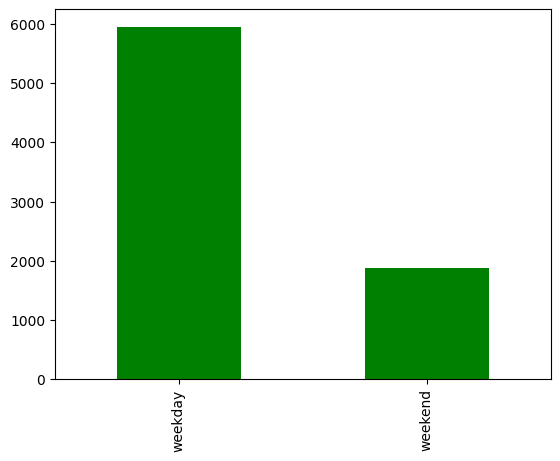

In [ ]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

df['주말여부'] = pd.to_datetime([d for d, t in df['시각'].str.split('_')])
df['시각'] = pd.Series([t for d, t in df['시각'].str.split('_')]).replace('시',"")

df['주말여부'] = df['주말여부'].dt.day_name()
df['주말여부'] = df['주말여부'].apply(lambda x: "weekend" if x in ['Saturday','Sunday'] else "weekday")
df['주말여부'].value_counts().plot(kind='bar',color='g');

## 4-2 '피해자신체상해정도' 에 따라 각 독립변수들이 유의한지 통계적 검정하라.

- 나이 및 시각을 수치로 바꾼다

In [ ]:
for c in ['가해자연령','피해자연령']:
    df[c] = df[c].apply(lambda x: x.replace("세",""))

In [ ]:
# 결측치 제거
df.drop(df[df['가해자연령']=='불명'].index,axis=0, inplace=True)

In [ ]:
df['시각'] = df['시각'].apply(lambda x: x.replace("시","")).astype(int)
df['시각'].unique()

array([10, 20, 15,  6,  8,  7, 21, 19, 17, 22,  0,  4, 13,  9, 18, 12, 11,
        1, 14, 16,  2, 23,  5,  3])

In [ ]:
for c in ['가해자연령','피해자연령']:
    df[c] = df[c].astype(int)

- 범주형변수를 레이블인코딩

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 자동 선택
cat_cols = df.select_dtypes(include=['object']).columns

# 레이블 인코딩 수행
led = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    led[col] = le

# 결과 출력
df

,사고년도,가해자성별,가해자연령,가해차종,가해자신체상해정도,피해자성별,피해자연령,피해차종,피해자신체상해정도,사고유형,가해자법규위반,기상상태,시각,사건번호,주말여부
0,2015,0,46,6,3,1,64,6,0,5,9,0,10,7597,0
1,2019,0,53,5,3,1,57,6,0,12,9,0,10,6327,1
2,2015,0,39,5,3,0,63,6,1,5,3,0,20,7734,0
3,2016,0,12,9,3,0,52,2,0,1,9,0,15,1681,1
4,2015,0,54,5,3,0,63,6,1,5,9,0,6,7219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,2017,1,60,5,3,0,13,6,0,7,7,0,16,3826,0
7822,2018,1,62,5,3,1,76,6,1,11,3,0,13,5261,0
7823,2020,0,44,5,3,1,76,6,0,11,3,0,13,7261,0
7824,2016,0,61,5,3,0,27,6,0,5,3,0,22,1375,0


In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 회귀 모델 적합
X = df.drop('피해자신체상해정도', axis=1)
# X = sm.add_constant(X)  # 상수항 추가


y = df['피해자신체상해정도']
model = sm.OLS(y, X).fit()

# 결과 출력
model.summary()

## R스타일로 구하는 방법도 있음
# cols = ['사고년도', '가해자성별', '가해자연령', '가해차종', '가해자신체상해정도', '피해자성별', '피해자연령', '피해차종', '사고유형', '가해자법규위반', '기상상태', '주말여부','시각']
# import statsmodels.formula.api as sm
# model = sm.ols(f'피해자신체상해정도~{"+".join(cols)}',data = df).fit()
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              피해자신체상해정도   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.434
Method:                 Least Squares   F-statistic:                              428.8
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        22:09:41   Log-Likelihood:                         -5305.2
No. Observations:                7823   AIC:                                  1.064e+04
Df Residuals:                    7809   BIC:                                  1.074e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
사고년도        5.733e-05   2.92e-05      1.963      0.050    9.19e-08       0.000
가해자성별         -0.0163      0.013     -1.238      0.216      -0.042       0.010
가해자연령         -0.0008      0.000     -2.262      0.024      -0.001      -0.000
가해차종          -0.0005      0.003     -0.182      0.856      -0.006       0.005
가해자신체상해정도      0.0111      0.010      1.155      0.248      -0.008       0.030
피해자성별          0.0533      0.012      4.403      0.000       0.030       0.077
피해자연령          0.0046      0.000     18.222      0.000       0.004       0.005
피해차종           0.0195      0.006      3.216      0.001       0.008       0.031
사고유형           0.0036      0.002      1.729      0.084      -0.000       0.008
가해자법규위반        0.0013      0.002      0.565      0.572      -0.003       0.006
기상상태           0.0136      0.015      0.909      0.363      -0.016       0.043
시각            -0.0042      0.001     -4.061      0.000      -0.006      -0.002
사건번호       -7.582e-06   2.42e-06     -3.138      0.002   -1.23e-05   -2.85e-06
주말여부           0.0129      0.013      1.012      0.311      -0.012       0.038
==============================================================================
Omnibus:                    36597.067   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1051.882
Skew:                           0.360   Prob(JB):                    3.86e-229
Kurtosis:                       1.354   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 사고년도, 가해재연령, 피해자성별, 피해자연령, 피해차종, 시각이 p-value가 0.05이하로 통계적으로 유의하다 할수 있다

## 4-3 4-2 에서 유의한 변수들만을 가지고 '피해자신체상해정도'를 기준으로 SMOTE 오버샘플링을 수행하고 샘플링 데이터와 기존데이터를 합친 전체 데이터에 대해 범주형변수는 변수별 빈도를 나타내고 연속형이면 평균을 나타내시오

In [ ]:
X_resampled

,사고년도,가해자연령,피해자성별,피해자연령,피해차종,시각
0,2015,46,1,64,6,10
1,2019,53,1,57,6,10
2,2015,39,0,63,6,20
3,2016,12,0,52,2,15
4,2015,54,0,63,6,6
...,...,...,...,...,...,...
9351,2015,30,0,23,6,9
9352,2015,32,0,15,6,19
9353,2019,37,0,69,6,15
9354,2019,51,0,13,6,16


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
cols = ['사고년도', '가해자연령', '피해자성별', '피해자연령', '피해차종', '시각']

X = df[cols]
y = df['피해자신체상해정도']

# SMOTE 오버샘플링 적용
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# 오버샘플링 결과 확인
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

resampled_df

,사고년도,가해자연령,피해자성별,피해자연령,피해차종,시각,피해자신체상해정도
0,2015,46,1,64,6,10,0
1,2019,53,1,57,6,10,0
2,2015,39,0,63,6,20,1
3,2016,12,0,52,2,15,0
4,2015,54,0,63,6,6,1
...,...,...,...,...,...,...,...
9351,2015,31,0,24,6,11,1
9352,2015,57,0,52,6,6,1
9353,2016,28,0,27,6,18,1
9354,2017,23,0,57,6,21,1


## 4-4 4-3 데이터를 가지고 '피해자신체상해정도' 을 종속변수로 하여 로지스틱회귀분석, XGB 분류 분류 모델을 만들고 성능 비교를 하고 영향력 있는 변수를 확인하라

In [ ]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42, stratify=y_resampled)
lg = LogisticRegression()
xgb = XGBClassifier()
lg.fit(X_train,y_train)
xgb.fit(X_train,y_train)
pred_lg = lg.predict(X_test)
pred_xgb = xgb.predict(X_test)

print("LogisticRegression")
print(classification_report(y_test, pred_lg))
print()
print("XGBClassifier")
print(classification_report(y_test, pred_xgb))

LogisticRegression
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       936
           1       0.59      0.63      0.61       936

    accuracy                           0.60      1872
   macro avg       0.60      0.60      0.59      1872
weighted avg       0.60      0.60      0.59      1872


XGBClassifier
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       936
           1       0.61      0.65      0.63       936

    accuracy                           0.62      1872
   macro avg       0.62      0.62      0.62      1872
weighted avg       0.62      0.62      0.62      1872



# 통계 (40점)

## 5.
3개의 공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.    
각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p5.png)

In [40]:
df=pd.DataFrame({'지역1':[20,15,4,80],
'지역2':[5,2,14,50],
'지역3':[35,20,17,60],
'총생산량':[75,55,60,190]
}, index = ['공장A','공장B','공장C','총수요량'])

배송비용s =[]

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        배송단가 = df.iloc[i,j]
        if df.iloc[i,3]>df.iloc[3,i]:
            배송량 = df.iloc[3,i]
        else:
            배송량 = df.iloc[3,i]
        배송비용 = 배송단가 * 배송량
        배송비용s.append(배송비용)

np.array(배송비용s).min()

100

In [44]:
df

,지역1,지역2,지역3,총생산량
공장A,20,5,35,75
공장B,15,2,20,55
공장C,4,14,17,60
총수요량,80,50,60,190


## 데이터 설명
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv
- 데이터 설명 : 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3/ 범주형) 설문조사

## 6.1 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정해라.

In [ ]:
url = 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv'
df = pd.read_csv(url)
df

,나이,선호도
0,청년,2
1,장년,2
2,청년,2
3,청년,1
4,장년,1
...,...,...
272,청년,1
273,장년,1
274,노년,2
275,노년,2


In [ ]:
df_ = df.groupby(['나이','선호도']).agg('size').reset_index()
df_.columns = ['나이','선호도','개수']

H0 : 니이에 따라 선호도에는 차이가 없다
H1 : 나이에 따른 선호도에는 차이가 있다.

## 6.2 유의수준 하에서 통계 검정해라

- 여러 집단을 가진 하나의 독립 변수에 대해, 범주형 종속변수 차이를 검증한다
 > One-Way ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
# ANOVA 수행
grouped_data = [df['선호도'][df['나이'] == age_group] for age_group in df['나이'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# 결과 출력          
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("나이별 선호도에 통계적으로 유의한 차이가 있습니다.")
else:
    print("나이별 선호도에 통계적으로 유의한 차이가 없습니다.")

F-statistic: 0.07344869345120808
P-value: 0.9292021058717312
나이별 선호도에 통계적으로 유의한 차이가 없습니다.


## 데이터 설명
아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.

## 7.1 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라. (소숫점 이하 4번째 자리에서 반올림)

In [ ]:
# 이항분포
import scipy.stats as stats

# 아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.
n_children = 6
n_families = 5
p_girl = 0.5

# 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라.
p_4_or_more_girls = sum([stats.binom.pmf(k, n_children, p_girl) for k in range(4, n_children+1)])
prob_3_or_more_families = stats.binom.pmf(3, n_families, p_4_or_more_girls) + stats.binom.pmf(4, n_families, p_4_or_more_girls) + stats.binom.pmf(5, n_families, p_4_or_more_girls)
print(f"딸이 4명 이상인 가구가 3 가족 이상일 확률: {round(prob_3_or_more_families, 4)}")

딸이 4명 이상인 가구가 3 가족 이상일 확률: 0.2255


## 7.2 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가? (소숫점 이하 4번째 자리에서 반올림)

In [ ]:
# 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가?
expected_families = n_families * p_4_or_more_girls
print(f"5가족 중 4명 이상 딸을 가질 것으로 기대되는 가족 수: {round(expected_families, 4)}")

5가족 중 4명 이상 딸을 가질 것으로 기대되는 가족 수: 1.7188


created by datamanim [web-link](https://www.datamanim.com)